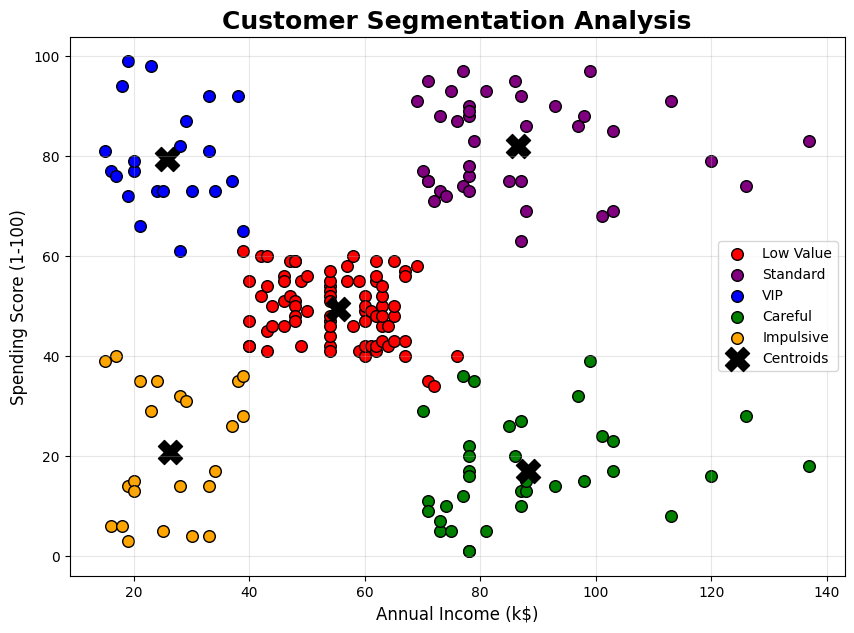

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(10,7))

# custom names for clusters
cluster_names = {
    0: "Low Value",
    1: "Standard",
    2: "VIP",
    3: "Careful",
    4: "Impulsive"
}

colors = ['red','purple','blue','green','orange']

for i in range(5):
    plt.scatter(
        X.iloc[clusters==i,0],
        X.iloc[clusters==i,1],
        s=70,
        c=colors[i],
        label=cluster_names[i],
        edgecolor='black'
    )

# centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:,0],
    centroids[:,1],
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title("Customer Segmentation Analysis", fontsize=18, fontweight='bold')
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()



In [17]:
summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
summary


Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                      55.3                    49.5
1                      86.5                    82.1
2                      25.7                    79.4
3                      88.2                    17.1
4                      26.3                    20.9

In [18]:
print("Customer Group Analysis:\n")

for i, row in summary.iterrows():
    income = row['Annual Income (k$)']
    spend = row['Spending Score (1-100)']

    if income > 70 and spend > 70:
        label = "VIP Customers"
    elif income > 70 and spend < 40:
        label = "Careful Rich Customers"
    elif income < 40 and spend > 60:
        label = "Impulsive Buyers"
    elif income < 40 and spend < 40:
        label = "Low Value Customers"
    else:
        label = "Average Customers"

    print(f"Cluster {i} → {label} (Income={income}, Spending={spend})")


Customer Group Analysis:

Cluster 0 → Average Customers (Income=55.3, Spending=49.5)
Cluster 1 → VIP Customers (Income=86.5, Spending=82.1)
Cluster 2 → Impulsive Buyers (Income=25.7, Spending=79.4)
Cluster 3 → Careful Rich Customers (Income=88.2, Spending=17.1)
Cluster 4 → Low Value Customers (Income=26.3, Spending=20.9)
